In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

9920512it [00:06, 1551310.81it/s]                                                                                      


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


0it [00:00, ?it/s]

32768it [00:00, 35670.93it/s]                                                                                          
0it [00:00, ?it/s]

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


1654784it [00:01, 895996.22it/s]                                                                                       
0it [00:00, ?it/s]

Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


8192it [00:00, 15765.67it/s]                                                                                           


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)
#DataLoader 의 역할
#data를 batch로 쪼개서 model에 적절히 먹여주는 역할

In [10]:
x, y = data[0][0], data[1][0]
print(x.shape)
print(y)
#data[0][...] from loaded by DataLoader is the training data
#data[1][...] is the labels

#pytorch에서 image dataload 하면 dimension(rgb) 추가 -> 1, 28, 28


torch.Size([1, 28, 28])
tensor(7)


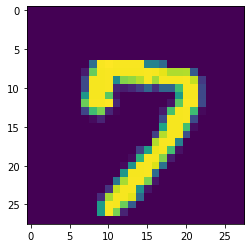

In [12]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28, 28))
#plt 는 2차원 tensor 에만 가능

In [13]:
#check if data is balanced
total = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter[int(y)] += 1
        total += 1
print(counter)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter:
    print(f"{i} : {counter[i] / total} %" )

0 : 0.09871666666666666 %
1 : 0.11236666666666667 %
2 : 0.0993 %
3 : 0.10218333333333333 %
4 : 0.09736666666666667 %
5 : 0.09035 %
6 : 0.09863333333333334 %
7 : 0.10441666666666667 %
8 : 0.09751666666666667 %
9 : 0.09915 %


In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #nn.Module 의 생성자 호출
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = nn.Dropout(0.4)(x)
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)  #dim=1 sum of output rows = 1   // dim = 0  : sum of output columns = 1

        return x

In [25]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
X = torch.rand((28, 28))
X = X.view([-1, 28*28])

In [30]:
output = net(X)

In [32]:
output

tensor([[-2.1665, -2.4194, -2.2059, -2.4178, -2.1910, -2.2765, -2.3746, -2.2322,
         -2.3502, -2.4413]], grad_fn=<LogSoftmaxBackward>)

In [35]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=1e-3)
#optimizer input 1. what parameters to train  2. learning rate
EPOCHS = 2

for epoch in range(EPOCHS):
    for data in trainset: #data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
         # start with zero grad
            
        output = net(X.view(-1, 28*28))
        # pass data into net

        loss = F.nll_loss(output, y)
        # calculate loss

        loss.backward()
        # backpropagate through the net
        
        optimizer.step()
        #minimize loss
    print(epoch)
    print(loss)

0
tensor(0.0040, grad_fn=<NllLossBackward>)
1
tensor(0.0177, grad_fn=<NllLossBackward>)


In [36]:
correct = 0
total = 0

with torch.no_grad(): #when we are testing we do not was gradients
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct / total, 3))
    

Accuracy:  0.978
